In [1]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('weather_data.txt', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

In [3]:
df = pd.read_csv('weather_data.txt', sep='\t', encoding=encoding)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stöð    893 non-null    int64  
 1    ár     893 non-null    int64  
 2   mán     893 non-null    int64  
 3     t     893 non-null    float64
 4     tx    893 non-null    float64
 5     txx   893 non-null    float64
 6   txxD1   893 non-null    int64  
 7     tn    893 non-null    float64
 8    tnn    893 non-null    float64
 9   tnnD1   893 non-null    int64  
 10   rh     893 non-null    float64
 11   r      893 non-null    float64
 12   rx     893 non-null    float64
 13  rxD1    893 non-null    int64  
 14   p      893 non-null    float64
 15   n      893 non-null    float64
 16  sun     893 non-null    float64
 17   f      893 non-null    float64
dtypes: float64(12), int64(6)
memory usage: 125.7 KB


In [5]:
df.columns = ['station_id', 'year', 'month', 'mean_temp', 'avg_max_temp', 'max_temp', 'max_temp_date',
              'avg_min_temp', 'min_temp', 'min_temp_date', 'mean_humidity', 'precipitation',
              'max_24hr_ppt', 'max_24hr_ppt_date', 'avg_sea_lvl_pressure',
              'mean_cloud_cover', 'hrs_sunshine', 'mean_wind_speed']

In [6]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')
df.set_index('date', inplace=True)

In [7]:
df.drop(columns=['station_id', 'avg_max_temp', 'avg_min_temp'], inplace=True)

In [8]:
df.sample(5)

,year,month,mean_temp,max_temp,max_temp_date,min_temp,min_temp_date,mean_humidity,precipitation,max_24hr_ppt,max_24hr_ppt_date,avg_sea_lvl_pressure,mean_cloud_cover,hrs_sunshine,mean_wind_speed
date,,,,,,,,,,,,,,,
1968-08-01,1968,8,10.4,16.1,11,3.0,16,81.0,60.4,10.1,9,1011.9,6.0,159.2,5.8
2011-04-01,2011,4,4.1,10.4,8,-1.6,17,80.0,138.9,12.7,30,995.5,6.5,114.3,5.9
1992-04-01,1992,4,2.6,9.1,23,-4.1,19,68.0,38.4,9.0,8,1005.0,5.8,147.3,6.6
1977-10-01,1977,10,5.0,11.4,14,-2.3,9,80.0,54.7,8.2,22,996.9,5.8,112.3,4.1
2002-06-01,2002,6,10.8,22.4,11,3.6,22,78.0,34.4,10.5,2,1006.9,6.0,186.4,3.6


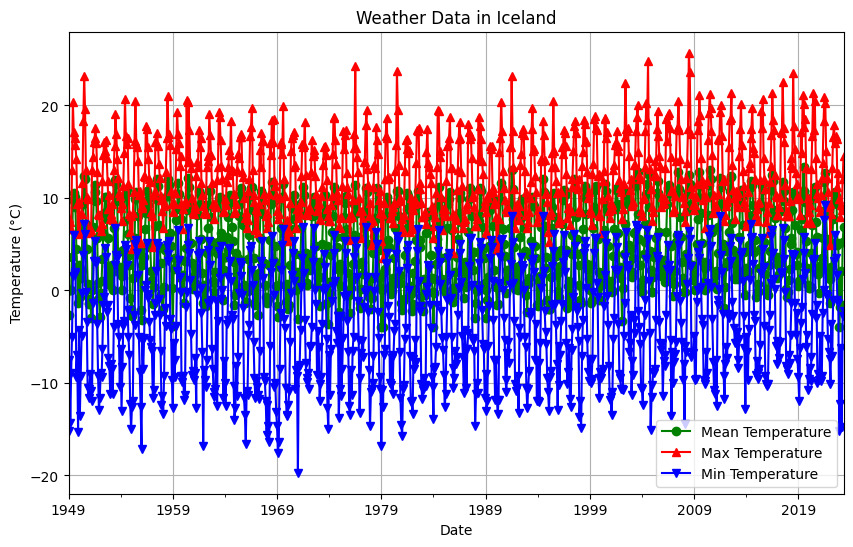

In [9]:
plt.figure(figsize=(10, 6))
df['mean_temp'].plot(marker='o', linestyle='-', color='green', label='Mean Temperature')
df['max_temp'].plot(marker='^', linestyle='-', color='red', label='Max Temperature')
df['min_temp'].plot(marker='v', linestyle='-', color='blue', label='Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Weather Data in Iceland')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print('max temp: ' + str(df['max_temp'].max()))
print('min temp: ' + str(df['min_temp'].min()))

max temp: 25.7
min temp: -19.7


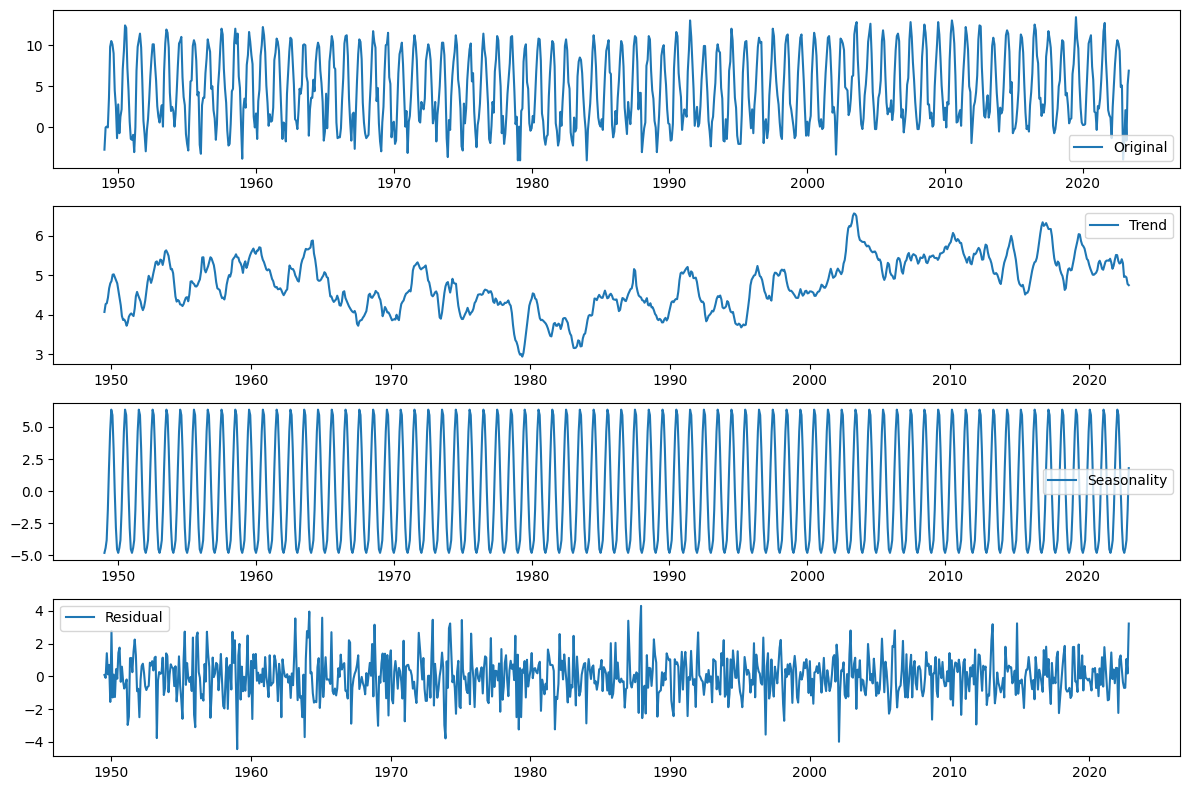

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform the time series decomposition
decomposition = seasonal_decompose(df['mean_temp'], model='additive')

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['mean_temp'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

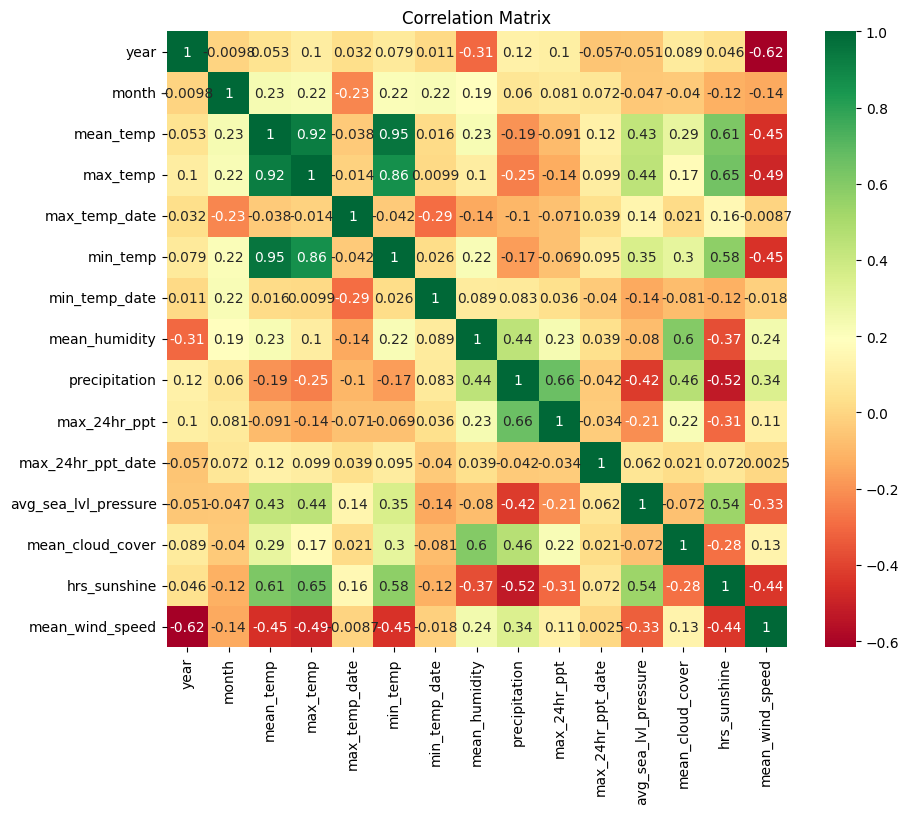

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.to_csv('weather_data.csv')